# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Your API Key
api_key = weather_api_key

# Build query URL
# Assuming 'city' variable contains the city name you want to retrieve data for
query_url = base_url + "q=" + city + "&appid=" + api_key

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Check if the response status code is 200 (OK)
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()
            
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather.get("coord", {}).get("lat", None)
            city_lng = city_weather.get("coord", {}).get("lon", None)
            city_max_temp = city_weather.get("main", {}).get("temp_max", None)
            city_humidity = city_weather.get("main", {}).get("humidity", None)
            city_clouds = city_weather.get("clouds", {}).get("all", None)
            city_wind = city_weather.get("wind", {}).get("speed", None)
            city_country = city_weather.get("sys", {}).get("country", None)
            city_date = city_weather.get("dt", None)

            # Append the City information into city_data list
            city_data.append({
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print(f"API request failed for city: {city}")

    # If an error is experienced, log the error and skip the city
    except Exception as e:
        print(f"Error processing city {city}: {str(e)}")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | banamba
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | zeya
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | iquitos
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | tazovsky
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | nova sintra
Processing Record 17 of Set 1 | sieradz
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | crane
Processing Record 20 of Set 1 | sandnessjoen
Processing Record 21 of Set 1 | ust'-uda
Processing Record 22 of Set 1 | iqaluit
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Converting the temp from kelvin into celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.41,73,4,9.74,PN,1696293611
1,albany,42.6001,-73.9662,17.07,85,24,0.89,US,1696293443
2,banamba,13.5500,-7.4500,26.32,63,100,3.53,ML,1696293642
3,invercargill,-46.4000,168.3500,13.90,54,7,4.02,NZ,1696293642
4,zeya,53.7500,127.2667,6.05,85,100,1.34,RU,1696293642


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,erdenet,49.0333,104.0833,-0.63,94,20,1.17,MN,1696279473
1,port alfred,-33.5906,26.8910,16.77,91,0,0.45,ZA,1696279473
2,margate,51.3813,1.3862,19.06,94,100,0.89,GB,1696279473
3,avarua,-21.2078,-159.7750,22.03,73,75,4.12,CK,1696279474
4,pangody,65.8500,74.4859,9.12,89,100,8.37,RU,1696279474


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

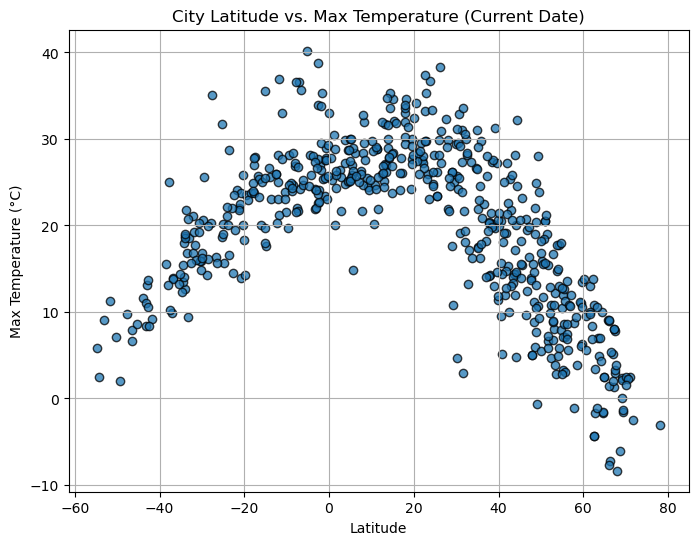

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()




#### Latitude Vs. Humidity

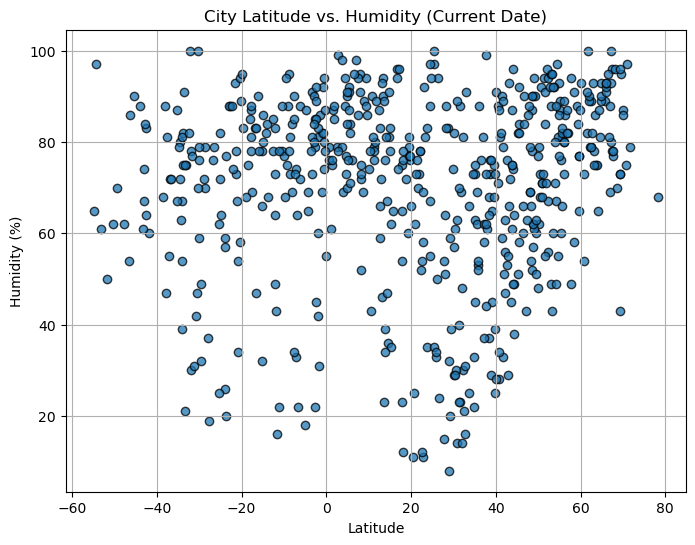

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

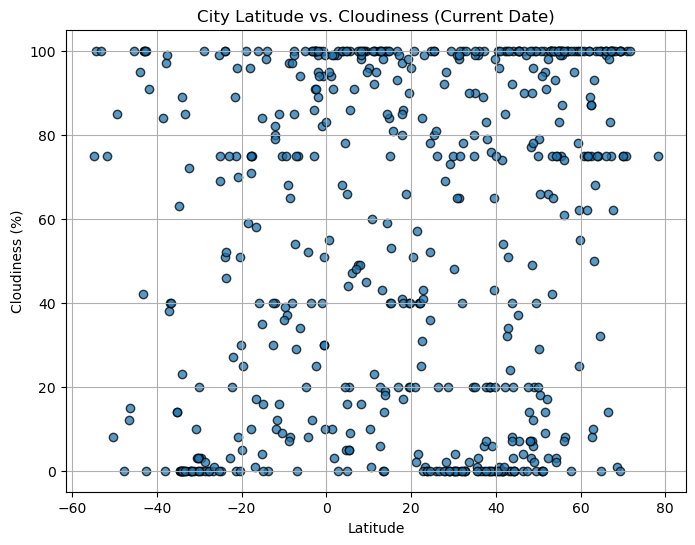

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

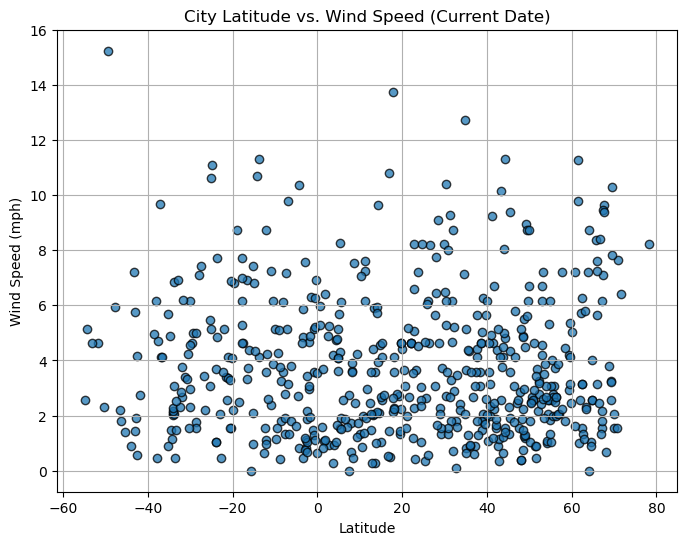

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,erdenet,49.0333,104.0833,-0.63,94,20,1.17,MN,1696279473
2,margate,51.3813,1.3862,19.06,94,100,0.89,GB,1696279473
4,pangody,65.8500,74.4859,9.12,89,100,8.37,RU,1696279474
6,ghadamis,30.1337,9.5007,25.69,29,0,6.48,LY,1696279474
8,volosovo,59.4333,29.4833,11.00,84,78,2.93,RU,1696279474


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,16.77,91,0,0.45,ZA,1696279473
3,avarua,-21.2078,-159.7750,22.03,73,75,4.12,CK,1696279474
5,waitangi,-43.9535,-176.5597,11.57,88,95,0.89,NZ,1696279474
7,west island,-12.1568,96.8225,24.99,73,40,8.75,CC,1696279474
10,san antonio de pale,-1.4014,5.6325,25.39,86,100,6.32,GQ,1696279474


###  Temperature vs. Latitude Linear Regression Plot

In [17]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

LinregressResult(slope=-0.4224847244695257, intercept=34.26901492545984, rvalue=-0.813247617738371, pvalue=1.1184517826986659e-94, stderr=0.015230064176931518, intercept_stderr=0.636660232582758)


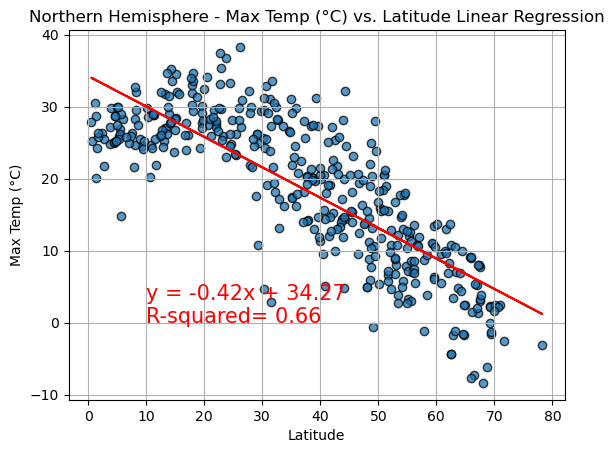

In [18]:
# Linear regression on Northern Hemisphere
x_values_north = northern_hemi_df["Lat"]
y_values_north = northern_hemi_df["Max Temp"]
title = "Northern Hemisphere - Max Temp (°C) vs. Latitude Linear Regression"
x_label_north = "Latitude"
y_label_north = "Max Temp (°C)"
line_position = (10, 0)  # Adjust the line annotation position as needed

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values_north, y_values_north)

# Calculate the regression line
regress_values = x_values_north * slope + intercept

# Create the scatter plot
plt.scatter(x_values_north, y_values_north, edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values_north, regress_values, "r-")

# Annotate the line equation and r value
line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared= {r_value**2:.2f}"
plt.annotate(line_eq, line_position, fontsize=15, color="red")

# Set the graph properties
plt.title(title)
plt.xlabel(x_label_north)
plt.ylabel(y_label_north)
plt.grid(True)

# Include the r value in the output
#print(f"R-squared (r value): {r_value**2:.2f}")
print(linregress(x_values_north,y_values_north))


# Show the plot
plt.show()


In [19]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

LinregressResult(slope=0.40484722566704173, intercept=29.639407642562794, rvalue=0.8028522475721134, pvalue=6.172719668647638e-41, stderr=0.022790659822456125, intercept_stderr=0.5686834222228422)


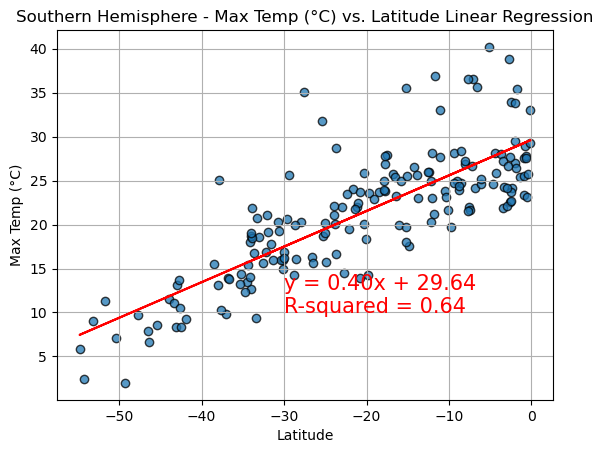

In [20]:
# Linear regression on Southern Hemisphere
x_values_south = southern_hemi_df["Lat"]
y_values_south = southern_hemi_df["Max Temp"] 
title_south = "Southern Hemisphere - Max Temp (°C) vs. Latitude Linear Regression"
x_label_south = "Latitude"
y_label_south = "Max Temp (°C)"
line_position_south = (-30, 10)  # Adjust the line annotation position as needed

# Perform linear regression
slope_south, intercept_south, r_value_south, p_value_south, std_err_south = linregress(x_values_south, y_values_south)

# Calculate the regression line
regress_values_south = x_values_south * slope_south + intercept_south

# Create the scatter plot
plt.scatter(x_values_south, y_values_south, edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values_south, regress_values_south, "r-")

# Annotate the line equation and r value
line_eq_south = f"y = {slope_south:.2f}x + {intercept_south:.2f}\nR-squared = {r_value_south**2:.2f}"
plt.annotate(line_eq_south, line_position_south, fontsize=15, color="red")

# Set the graph properties
plt.title(title_south)
plt.xlabel(x_label_south)
plt.ylabel(y_label_south)
plt.grid(True)

# Include the r value in the output
#print(f"R-squared (r value) - Southern Hemisphere: {r_value_south**2:.2f}")
print(linregress(x_values_south,y_values_south))


# Show the plot
plt.show()


**Discussion about the linear relationship:** 

In the Northern and Southern Hemispheres, there is a statistically significant linear relationship between the latitude and maximum temperature. In the Northern Hemisphere, the more you move north, the more temperatures decrease, while in the Southern Hemisphere, the more you move south, the more temperatures decrease. The strength of these relationships is indicated by the high correlation coefficients, and the p-values confirm the statistical significance of these relationships. These findings are consistent with the expected patterns related to Earth's climate and latitude.

### Humidity vs. Latitude Linear Regression Plot

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

LinregressResult(slope=0.1299012812263012, intercept=65.6542979640332, rvalue=0.12122652347009409, pvalue=0.0157932203620801, stderr=0.05358618320981233, intercept_stderr=2.240055686518779)


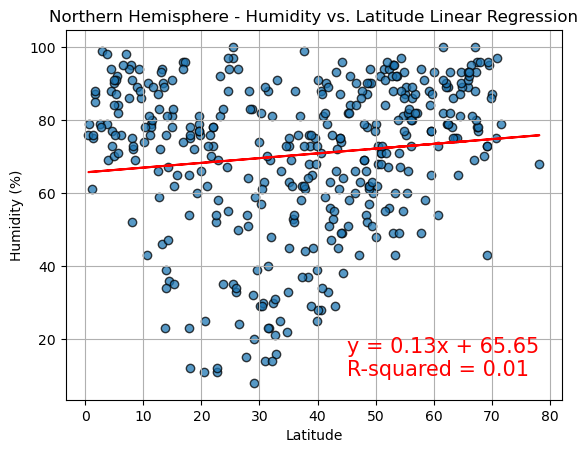

In [22]:
# Linear regression on Humidity vs. Latitude in the Northern Hemisphere
x_values_north_humidity = northern_hemi_df["Lat"]
y_values_north_humidity = northern_hemi_df["Humidity"]
title_north_humidity = "Northern Hemisphere - Humidity vs. Latitude Linear Regression"
x_label_north_humidity = "Latitude"
y_label_north_humidity = "Humidity (%)"
line_position_north_humidity = (45, 10)  # Adjust the line annotation position as needed

# Perform linear regression
slope_north_humidity, intercept_north_humidity, r_value_north_humidity, p_value_north_humidity, std_err_north_humidity = linregress(x_values_north_humidity, y_values_north_humidity)

# Calculate the regression line
regress_values_north_humidity = x_values_north_humidity * slope_north_humidity + intercept_north_humidity

# Create the scatter plot
plt.scatter(x_values_north_humidity, y_values_north_humidity, edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values_north_humidity, regress_values_north_humidity, "r-")

# Annotate the line equation and r value
line_eq_north_humidity = f"y = {slope_north_humidity:.2f}x + {intercept_north_humidity:.2f}\nR-squared = {r_value_north_humidity**2:.2f}"
plt.annotate(line_eq_north_humidity, line_position_north_humidity, fontsize=15, color="red")

# Set the graph properties
plt.title(title_north_humidity)
plt.xlabel(x_label_north_humidity)
plt.ylabel(y_label_north_humidity)
plt.grid(True)

# Include the r value in the output
#print(f"R-squared (r value) - Northern Hemisphere (Humidity vs. Latitude): {r_value_north_humidity**2:.2f}")
print(linregress(x_values_north_humidity,y_values_north_humidity))


# Show the plot
plt.show()


In [23]:
# Southern Hemisphere
# YOUR CODE HERE

LinregressResult(slope=0.11162201729690142, intercept=72.19088328101515, rvalue=0.08154820854728867, pvalue=0.281952544492087, stderr=0.10342176423637048, intercept_stderr=2.5806292260267156)


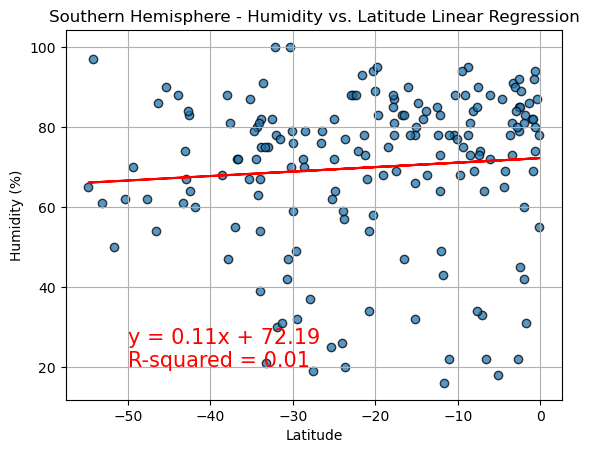

In [24]:
# Linear regression on Humidity vs. Latitude in the Southern Hemisphere
x_values_south_humidity = southern_hemi_df["Lat"]
y_values_south_humidity = southern_hemi_df["Humidity"]
title_south_humidity = "Southern Hemisphere - Humidity vs. Latitude Linear Regression"
x_label_south_humidity = "Latitude"
y_label_south_humidity = "Humidity (%)"
line_position_south_humidity = (-50, 20)  # Adjust the line annotation position as needed

# Perform linear regression
slope_south_humidity, intercept_south_humidity, r_value_south_humidity, p_value_south_humidity, std_err_south_humidity = linregress(x_values_south_humidity, y_values_south_humidity)

# Calculate the regression line
regress_values_south_humidity = x_values_south_humidity * slope_south_humidity + intercept_south_humidity

# Create the scatter plot
plt.scatter(x_values_south_humidity, y_values_south_humidity, edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values_south_humidity, regress_values_south_humidity, "r-")

# Annotate the line equation and r value
line_eq_south_humidity = f"y = {slope_south_humidity:.2f}x + {intercept_south_humidity:.2f}\nR-squared = {r_value_south_humidity**2:.2f}"
plt.annotate(line_eq_south_humidity, line_position_south_humidity, fontsize=15, color="red")

# Set the graph properties
plt.title(title_south_humidity)
plt.xlabel(x_label_south_humidity)
plt.ylabel(y_label_south_humidity)
plt.grid(True)

# Include the r value in the output
#print(f"R-squared (r value) - Southern Hemisphere (Humidity vs. Latitude): {r_value_south_humidity**2:.2f}")
print(linregress(x_values_south_humidity,y_values_south_humidity))


# Show the plot
plt.show()


**Discussion about the linear relationship:** 

In the Northern and Southern Hemispheres, there are positive but weak linear relationships between latitude and humidity. In the Northern Hemisphere, the r-value suggests a weak positive linear relationship. This value is close to zero, indicating a weak correlation between latitude and humidity in the Northern Hemisphere.  While in the Southern Hemisphere, it shares this weak correlation. These findings suggest that latitude may not be enough to predict the humidity of a region, and other factors may play an important role in influencing humidity.

### Cloudiness vs. Latitude Linear Regression Plot

In [25]:
# Northern Hemisphere
# YOUR CODE HERE

LinregressResult(slope=0.23026475047449688, intercept=48.83697661916325, rvalue=0.11155149427152825, pvalue=0.026434951774887732, stderr=0.10334390811901423, intercept_stderr=4.320070868691429)


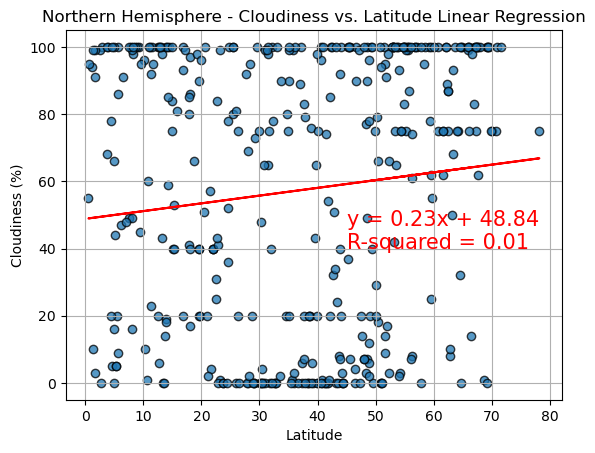

In [26]:
# Linear regression on Cloudiness vs. Latitude in the Northern Hemisphere
x_values_north_cloudiness = northern_hemi_df["Lat"]
y_values_north_cloudiness = northern_hemi_df["Cloudiness"]
title_north_cloudiness = "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression"
x_label_north_cloudiness = "Latitude"
y_label_north_cloudiness = "Cloudiness (%)"
line_position_north_cloudiness = (45, 40)  # Adjust the line annotation position as needed

# Perform linear regression
slope_north_cloudiness, intercept_north_cloudiness, r_value_north_cloudiness, p_value_north_cloudiness, std_err_north_cloudiness = linregress(x_values_north_cloudiness, y_values_north_cloudiness)

# Calculate the regression line
regress_values_north_cloudiness = x_values_north_cloudiness * slope_north_cloudiness + intercept_north_cloudiness

# Create the scatter plot
plt.scatter(x_values_north_cloudiness, y_values_north_cloudiness, edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values_north_cloudiness, regress_values_north_cloudiness, "r-")

# Annotate the line equation and r value
line_eq_north_cloudiness = f"y = {slope_north_cloudiness:.2f}x + {intercept_north_cloudiness:.2f}\nR-squared = {r_value_north_cloudiness**2:.2f}"
plt.annotate(line_eq_north_cloudiness, line_position_north_cloudiness, fontsize=15, color="red")

# Set the graph properties
plt.title(title_north_cloudiness)
plt.xlabel(x_label_north_cloudiness)
plt.ylabel(y_label_north_cloudiness)
plt.grid(True)

# Include the r value in the output
#print(f"R-squared (r value) - Northern Hemisphere (Cloudiness vs. Latitude): {r_value_north_cloudiness**2:.2f}")
print(linregress(x_values_north_cloudiness,y_values_north_cloudiness))


# Show the plot
plt.show()


In [27]:
# Southern Hemisphere
# YOUR CODE HERE

LinregressResult(slope=0.6243410495020427, intercept=61.904909616403586, rvalue=0.22760109771516157, pvalue=0.0023821107125056164, stderr=0.20249876161840438, intercept_stderr=5.052845755679894)


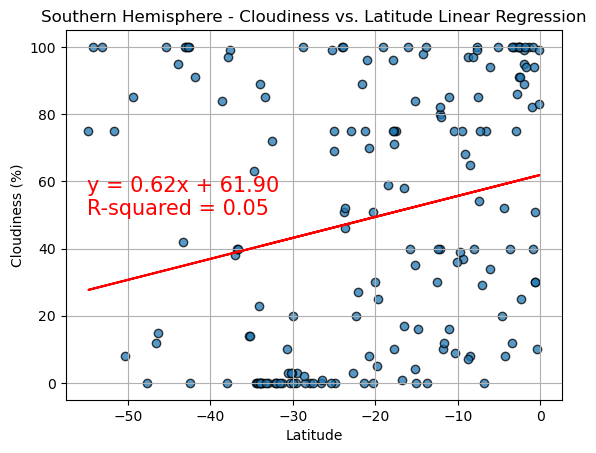

In [28]:
# Linear regression on Cloudiness vs. Latitude in the Southern Hemisphere
x_values_south_cloudiness = southern_hemi_df["Lat"]
y_values_south_cloudiness = southern_hemi_df["Cloudiness"]
title_south_cloudiness = "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression"
x_label_south_cloudiness = "Latitude"
y_label_south_cloudiness = "Cloudiness (%)"
line_position_south_cloudiness = (-55, 50)  # Adjust the line annotation position as needed

# Perform linear regression
slope_south_cloudiness, intercept_south_cloudiness, r_value_south_cloudiness, p_value_south_cloudiness, std_err_south_cloudiness = linregress(x_values_south_cloudiness, y_values_south_cloudiness)

# Calculate the regression line
regress_values_south_cloudiness = x_values_south_cloudiness * slope_south_cloudiness + intercept_south_cloudiness

# Create the scatter plot
plt.scatter(x_values_south_cloudiness, y_values_south_cloudiness, edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values_south_cloudiness, regress_values_south_cloudiness, "r-")

# Annotate the line equation and r value
line_eq_south_cloudiness = f"y = {slope_south_cloudiness:.2f}x + {intercept_south_cloudiness:.2f}\nR-squared = {r_value_south_cloudiness**2:.2f}"
plt.annotate(line_eq_south_cloudiness, line_position_south_cloudiness, fontsize=15, color="red")

# Set the graph properties
plt.title(title_south_cloudiness)
plt.xlabel(x_label_south_cloudiness)
plt.ylabel(y_label_south_cloudiness)
plt.grid(True)

# Include the r value in the output
#print(f"R-squared (r value) - Southern Hemisphere (Cloudiness vs. Latitude): {r_value_south_cloudiness**2:.2f}")
print(linregress(x_values_south_cloudiness,y_values_south_cloudiness))


# Show the plot
plt.show()


**Discussion about the linear relationship:** 

There are positive but relatively weak linear relationships between latitude and cloudiness in both hemispheres. In the Northern Hemisphere, due to its p-value being close to but not reaching 0, the relationship is statistically significant.  While in the Southern Hemisphere, due to its p-value reaching 0, the relationship is also statistically significant. Both hemispheres have low r-values which suggests that while latitude can influence cloudiness to some extent, it is not the only factor, and other factors may also play a significant role in cloud formation in these regions.

### Wind Speed vs. Latitude Linear Regression Plot

In [29]:
# Northern Hemisphere
# YOUR CODE HERE

LinregressResult(slope=0.010837401446322361, intercept=3.2543987874326765, rvalue=0.08463544804597292, pvalue=0.0925845543484011, stderr=0.00642781982205845, intercept_stderr=0.26870124875181584)


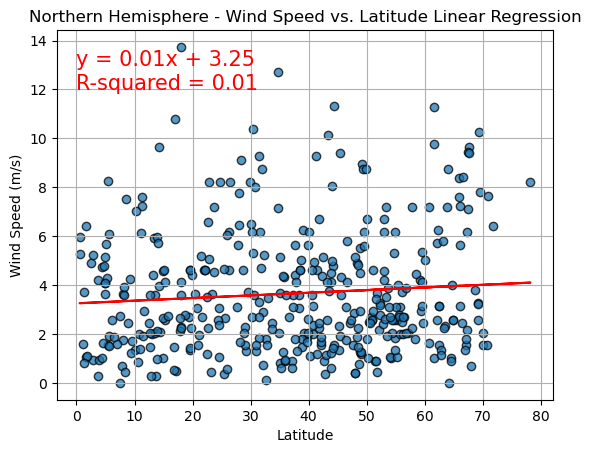

In [30]:
# Linear regression on Wind Speed vs. Latitude in the Northern Hemisphere
x_values_north_wind = northern_hemi_df["Lat"]
y_values_north_wind = northern_hemi_df["Wind Speed"]
title_north_wind = "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression"
x_label_north_wind = "Latitude"
y_label_north_wind = "Wind Speed (m/s)"
line_position_north_wind = (0, 12)  # Adjust the line annotation position as needed

# Perform linear regression
slope_north_wind, intercept_north_wind, r_value_north_wind, p_value_north_wind, std_err_north_wind = linregress(x_values_north_wind, y_values_north_wind)

# Calculate the regression line
regress_values_north_wind = x_values_north_wind * slope_north_wind + intercept_north_wind

# Create the scatter plot
plt.scatter(x_values_north_wind, y_values_north_wind, edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values_north_wind, regress_values_north_wind, "r-")

# Annotate the line equation and r value
line_eq_north_wind = f"y = {slope_north_wind:.2f}x + {intercept_north_wind:.2f}\nR-squared = {r_value_north_wind**2:.2f}"
plt.annotate(line_eq_north_wind, line_position_north_wind, fontsize=15, color="red")

# Set the graph properties
plt.title(title_north_wind)
plt.xlabel(x_label_north_wind)
plt.ylabel(y_label_north_wind)
plt.grid(True)

# Include the r value in the output
#print(f"R-squared (r value) - Northern Hemisphere (Wind Speed vs. Latitude): {r_value_north_wind**2:.2f}")
print(linregress(x_values_north_wind,y_values_north_wind))


# Show the plot
plt.show()


In [31]:
# Southern Hemisphere
# YOUR CODE HERE

LinregressResult(slope=-0.009870740605983542, intercept=3.6708914402846076, rvalue=-0.0542642560191805, pvalue=0.47442722653495895, stderr=0.013769586699412497, intercept_stderr=0.34358529975952845)


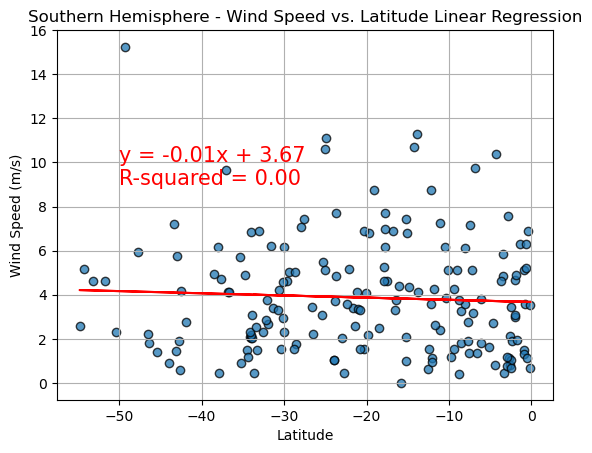

In [32]:
# Linear regression on Wind Speed vs. Latitude in the Southern Hemisphere
x_values_south_wind = southern_hemi_df["Lat"]
y_values_south_wind = southern_hemi_df["Wind Speed"]
title_south_wind = "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression"
x_label_south_wind = "Latitude"
y_label_south_wind = "Wind Speed (m/s)"
line_position_south_wind = (-50, 9)  # Adjust the line annotation position as needed

# Perform linear regression
slope_south_wind, intercept_south_wind, r_value_south_wind, p_value_south_wind, std_err_south_wind = linregress(x_values_south_wind, y_values_south_wind)

# Calculate the regression line
regress_values_south_wind = x_values_south_wind * slope_south_wind + intercept_south_wind

# Create the scatter plot
plt.scatter(x_values_south_wind, y_values_south_wind, edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(x_values_south_wind, regress_values_south_wind, "r-")

# Annotate the line equation and r value
line_eq_south_wind = f"y = {slope_south_wind:.2f}x + {intercept_south_wind:.2f}\nR-squared = {r_value_south_wind**2:.2f}"
plt.annotate(line_eq_south_wind, line_position_south_wind, fontsize=15, color="red")

# Set the graph properties
plt.title(title_south_wind)
plt.xlabel(x_label_south_wind)
plt.ylabel(y_label_south_wind)
plt.grid(True)

# Include the r value in the output
#print(f"R-squared (r value) - Southern Hemisphere (Wind Speed vs. Latitude): {r_value_south_wind**2:.2f}")
print(linregress(x_values_south_wind,y_values_south_wind))
# Show the plot
plt.show()


**Discussion about the linear relationship:** 

There are very weak and statistically non-significant linear relationships between latitude and wind speed in both hemispheres. While there is a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere, these correlations are so weak that they are practically meaningless for predicting wind speed based  on latitude alone. Other factors, such as climate patterns, are probably a good indicator of wind speed.